In [1]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=8000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


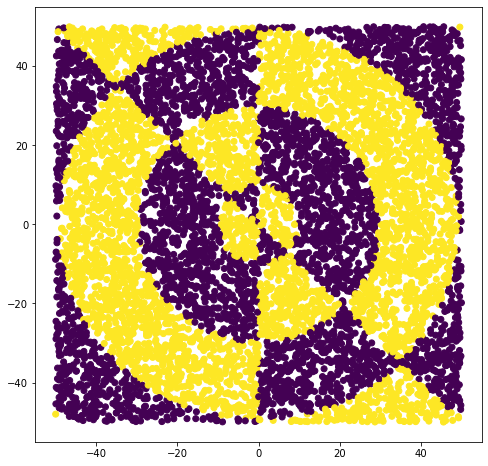

In [2]:
%run nonlinear_function.py

TYPE=2

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 0.0
data: 8000
train: 6400


<function matplotlib.pyplot.show(close=None, block=None)>

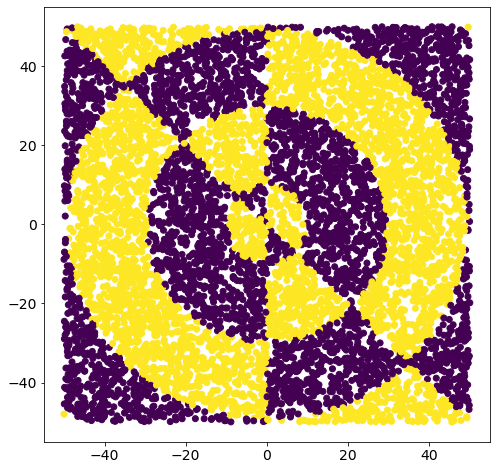

In [4]:
#keras work with numpy arrays: just use them from the start
TYPE=2
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [5]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 6400 	 Validation: 1600


In [6]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.10192729 -1.03055499]
 [ 0.22516501  0.3213575 ]
 [ 1.59714977  0.52063386]
 ...
 [-1.20475364 -1.44757585]
 [-0.57680258 -0.24647348]
 [ 1.30843567  0.53900453]]


In [7]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='tanh'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1,activation='sigmoid'))
    
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 30)                90        
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3

In [8]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='adam',
               metrics=['accuracy'])

In [9]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
72/72 - 2s - loss: 0.6925 - accuracy: 0.5100 - val_loss: 0.6899 - val_accuracy: 0.5294 - 2s/epoch - 32ms/step
Epoch 2/500
72/72 - 0s - loss: 0.6895 - accuracy: 0.5366 - val_loss: 0.6883 - val_accuracy: 0.5269 - 166ms/epoch - 2ms/step
Epoch 3/500
72/72 - 0s - loss: 0.6859 - accuracy: 0.5597 - val_loss: 0.6839 - val_accuracy: 0.5769 - 164ms/epoch - 2ms/step
Epoch 4/500
72/72 - 0s - loss: 0.6774 - accuracy: 0.5869 - val_loss: 0.6774 - val_accuracy: 0.5956 - 164ms/epoch - 2ms/step
Epoch 5/500
72/72 - 0s - loss: 0.6712 - accuracy: 0.6105 - val_loss: 0.6739 - val_accuracy: 0.6006 - 164ms/epoch - 2ms/step
Epoch 6/500
72/72 - 0s - loss: 0.6639 - accuracy: 0.6283 - val_loss: 0.6663 - val_accuracy: 0.6263 - 168ms/epoch - 2ms/step
Epoch 7/500
72/72 - 0s - loss: 0.6560 - accuracy: 0.6381 - val_loss: 0.6624 - val_accuracy: 0.6194 - 168ms/epoch - 2ms/step
Epoch 8/500
72/72 - 0s - loss: 0.6496 - accuracy: 0.6600 - val_loss: 0.6516 - val_accuracy: 0.6344 - 170ms/epoch - 2ms/step
Epoch 9/50

Epoch 67/500
72/72 - 0s - loss: 0.1923 - accuracy: 0.9200 - val_loss: 0.1467 - val_accuracy: 0.9375 - 166ms/epoch - 2ms/step
Epoch 68/500
72/72 - 0s - loss: 0.1751 - accuracy: 0.9275 - val_loss: 0.1528 - val_accuracy: 0.9369 - 167ms/epoch - 2ms/step
Epoch 69/500
72/72 - 0s - loss: 0.1817 - accuracy: 0.9236 - val_loss: 0.1561 - val_accuracy: 0.9287 - 164ms/epoch - 2ms/step
Epoch 70/500
72/72 - 0s - loss: 0.1795 - accuracy: 0.9256 - val_loss: 0.2082 - val_accuracy: 0.9031 - 169ms/epoch - 2ms/step
Epoch 71/500
72/72 - 0s - loss: 0.2372 - accuracy: 0.9075 - val_loss: 0.1562 - val_accuracy: 0.9331 - 163ms/epoch - 2ms/step
Epoch 72/500
72/72 - 0s - loss: 0.1708 - accuracy: 0.9289 - val_loss: 0.1402 - val_accuracy: 0.9388 - 189ms/epoch - 3ms/step
Epoch 73/500
72/72 - 0s - loss: 0.1715 - accuracy: 0.9252 - val_loss: 0.1583 - val_accuracy: 0.9244 - 169ms/epoch - 2ms/step
Epoch 74/500
72/72 - 0s - loss: 0.1973 - accuracy: 0.9162 - val_loss: 0.1578 - val_accuracy: 0.9269 - 191ms/epoch - 3ms/step


Epoch 133/500
72/72 - 0s - loss: 0.0982 - accuracy: 0.9642 - val_loss: 0.0757 - val_accuracy: 0.9681 - 206ms/epoch - 3ms/step
Epoch 134/500
72/72 - 0s - loss: 0.1017 - accuracy: 0.9609 - val_loss: 0.0894 - val_accuracy: 0.9650 - 278ms/epoch - 4ms/step
Epoch 135/500
72/72 - 0s - loss: 0.0946 - accuracy: 0.9652 - val_loss: 0.0967 - val_accuracy: 0.9600 - 249ms/epoch - 3ms/step
Epoch 136/500
72/72 - 0s - loss: 0.0947 - accuracy: 0.9644 - val_loss: 0.0842 - val_accuracy: 0.9650 - 217ms/epoch - 3ms/step
Epoch 137/500
72/72 - 0s - loss: 0.0940 - accuracy: 0.9627 - val_loss: 0.0900 - val_accuracy: 0.9625 - 225ms/epoch - 3ms/step
Epoch 138/500
72/72 - 0s - loss: 0.1092 - accuracy: 0.9600 - val_loss: 0.0695 - val_accuracy: 0.9725 - 205ms/epoch - 3ms/step
Epoch 139/500
72/72 - 0s - loss: 0.0917 - accuracy: 0.9683 - val_loss: 0.0781 - val_accuracy: 0.9656 - 162ms/epoch - 2ms/step
Epoch 140/500
72/72 - 0s - loss: 0.1103 - accuracy: 0.9572 - val_loss: 0.0601 - val_accuracy: 0.9769 - 211ms/epoch - 3

72/72 - 0s - loss: 0.0860 - accuracy: 0.9647 - val_loss: 0.0749 - val_accuracy: 0.9675 - 163ms/epoch - 2ms/step
Epoch 199/500
72/72 - 0s - loss: 0.0758 - accuracy: 0.9727 - val_loss: 0.0527 - val_accuracy: 0.9794 - 177ms/epoch - 2ms/step
Epoch 200/500
72/72 - 0s - loss: 0.0742 - accuracy: 0.9748 - val_loss: 0.0948 - val_accuracy: 0.9619 - 195ms/epoch - 3ms/step
Epoch 201/500
72/72 - 0s - loss: 0.0799 - accuracy: 0.9727 - val_loss: 0.0604 - val_accuracy: 0.9750 - 196ms/epoch - 3ms/step
Epoch 202/500
72/72 - 0s - loss: 0.0850 - accuracy: 0.9689 - val_loss: 0.0841 - val_accuracy: 0.9681 - 165ms/epoch - 2ms/step
Epoch 203/500
72/72 - 0s - loss: 0.0818 - accuracy: 0.9695 - val_loss: 0.0605 - val_accuracy: 0.9744 - 159ms/epoch - 2ms/step
Epoch 204/500
72/72 - 0s - loss: 0.0913 - accuracy: 0.9653 - val_loss: 0.0582 - val_accuracy: 0.9744 - 162ms/epoch - 2ms/step
Epoch 205/500
72/72 - 0s - loss: 0.0843 - accuracy: 0.9689 - val_loss: 0.0759 - val_accuracy: 0.9663 - 163ms/epoch - 2ms/step
Epoch 

Epoch 264/500
72/72 - 0s - loss: 0.0782 - accuracy: 0.9700 - val_loss: 0.0521 - val_accuracy: 0.9787 - 164ms/epoch - 2ms/step
Epoch 265/500
72/72 - 0s - loss: 0.0619 - accuracy: 0.9767 - val_loss: 0.0619 - val_accuracy: 0.9762 - 164ms/epoch - 2ms/step
Epoch 266/500
72/72 - 0s - loss: 0.0660 - accuracy: 0.9742 - val_loss: 0.0518 - val_accuracy: 0.9756 - 167ms/epoch - 2ms/step
Epoch 267/500
72/72 - 0s - loss: 0.0688 - accuracy: 0.9759 - val_loss: 0.0762 - val_accuracy: 0.9675 - 161ms/epoch - 2ms/step
Epoch 268/500
72/72 - 0s - loss: 0.0656 - accuracy: 0.9748 - val_loss: 0.0532 - val_accuracy: 0.9750 - 168ms/epoch - 2ms/step
Epoch 269/500
72/72 - 0s - loss: 0.0645 - accuracy: 0.9747 - val_loss: 0.0570 - val_accuracy: 0.9775 - 163ms/epoch - 2ms/step
Epoch 270/500
72/72 - 0s - loss: 0.0737 - accuracy: 0.9725 - val_loss: 0.0652 - val_accuracy: 0.9706 - 161ms/epoch - 2ms/step
Epoch 271/500
72/72 - 0s - loss: 0.0635 - accuracy: 0.9750 - val_loss: 0.0847 - val_accuracy: 0.9638 - 165ms/epoch - 2

72/72 - 0s - loss: 0.0613 - accuracy: 0.9761 - val_loss: 0.0451 - val_accuracy: 0.9825 - 169ms/epoch - 2ms/step
Epoch 330/500
72/72 - 0s - loss: 0.0586 - accuracy: 0.9797 - val_loss: 0.0838 - val_accuracy: 0.9700 - 170ms/epoch - 2ms/step
Epoch 331/500
72/72 - 0s - loss: 0.0734 - accuracy: 0.9728 - val_loss: 0.0553 - val_accuracy: 0.9769 - 166ms/epoch - 2ms/step
Epoch 332/500
72/72 - 0s - loss: 0.0549 - accuracy: 0.9819 - val_loss: 0.0484 - val_accuracy: 0.9775 - 164ms/epoch - 2ms/step
Epoch 333/500
72/72 - 0s - loss: 0.0793 - accuracy: 0.9680 - val_loss: 0.0890 - val_accuracy: 0.9619 - 164ms/epoch - 2ms/step
Epoch 334/500
72/72 - 0s - loss: 0.0823 - accuracy: 0.9670 - val_loss: 0.0801 - val_accuracy: 0.9663 - 168ms/epoch - 2ms/step
Epoch 335/500
72/72 - 0s - loss: 0.0961 - accuracy: 0.9669 - val_loss: 0.0752 - val_accuracy: 0.9631 - 165ms/epoch - 2ms/step
Epoch 336/500
72/72 - 0s - loss: 0.0562 - accuracy: 0.9794 - val_loss: 0.1088 - val_accuracy: 0.9606 - 165ms/epoch - 2ms/step
Epoch 

Epoch 395/500
72/72 - 0s - loss: 0.0624 - accuracy: 0.9764 - val_loss: 0.0575 - val_accuracy: 0.9750 - 163ms/epoch - 2ms/step
Epoch 396/500
72/72 - 0s - loss: 0.0689 - accuracy: 0.9737 - val_loss: 0.0528 - val_accuracy: 0.9769 - 170ms/epoch - 2ms/step
Epoch 397/500
72/72 - 0s - loss: 0.0539 - accuracy: 0.9800 - val_loss: 0.1413 - val_accuracy: 0.9550 - 163ms/epoch - 2ms/step
Epoch 398/500
72/72 - 0s - loss: 0.0950 - accuracy: 0.9659 - val_loss: 0.0502 - val_accuracy: 0.9737 - 166ms/epoch - 2ms/step
Epoch 399/500
72/72 - 0s - loss: 0.0605 - accuracy: 0.9783 - val_loss: 0.0772 - val_accuracy: 0.9669 - 168ms/epoch - 2ms/step
Epoch 400/500
72/72 - 0s - loss: 0.0614 - accuracy: 0.9766 - val_loss: 0.0612 - val_accuracy: 0.9725 - 164ms/epoch - 2ms/step
Epoch 401/500
72/72 - 0s - loss: 0.0665 - accuracy: 0.9753 - val_loss: 0.0680 - val_accuracy: 0.9725 - 163ms/epoch - 2ms/step
Epoch 402/500
72/72 - 0s - loss: 0.0568 - accuracy: 0.9777 - val_loss: 0.0469 - val_accuracy: 0.9762 - 162ms/epoch - 2

72/72 - 0s - loss: 0.0644 - accuracy: 0.9752 - val_loss: 0.0755 - val_accuracy: 0.9712 - 167ms/epoch - 2ms/step
Epoch 461/500
72/72 - 0s - loss: 0.0734 - accuracy: 0.9741 - val_loss: 0.0524 - val_accuracy: 0.9769 - 166ms/epoch - 2ms/step
Epoch 462/500
72/72 - 0s - loss: 0.0573 - accuracy: 0.9791 - val_loss: 0.0703 - val_accuracy: 0.9781 - 161ms/epoch - 2ms/step
Epoch 463/500
72/72 - 0s - loss: 0.0563 - accuracy: 0.9770 - val_loss: 0.0555 - val_accuracy: 0.9775 - 164ms/epoch - 2ms/step
Epoch 464/500
72/72 - 0s - loss: 0.0517 - accuracy: 0.9806 - val_loss: 0.0563 - val_accuracy: 0.9756 - 163ms/epoch - 2ms/step
Epoch 465/500
72/72 - 0s - loss: 0.0636 - accuracy: 0.9770 - val_loss: 0.0573 - val_accuracy: 0.9712 - 168ms/epoch - 2ms/step
Epoch 466/500
72/72 - 0s - loss: 0.0530 - accuracy: 0.9802 - val_loss: 0.0577 - val_accuracy: 0.9737 - 170ms/epoch - 2ms/step
Epoch 467/500
72/72 - 0s - loss: 0.0511 - accuracy: 0.9802 - val_loss: 0.1205 - val_accuracy: 0.9619 - 165ms/epoch - 2ms/step
Epoch 

[0.06909529864788055, 0.06319655478000641]


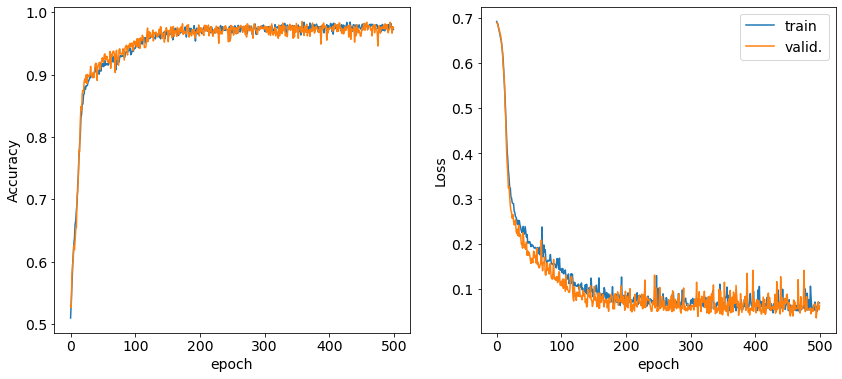

In [13]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('LC-2F-G-8.png')
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)

In [14]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
pred = model.predict(grid_r)

51 2601
[50. 50.]


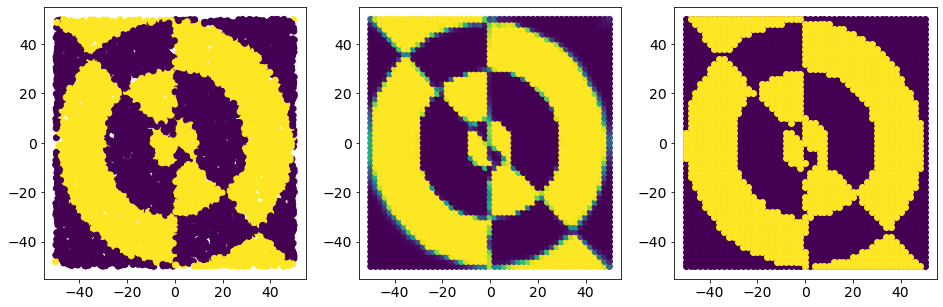

In [15]:
    
def boundaries():  
    x=np.linspace(-np.sqrt((np.pi**2)),np.sqrt((np.pi**2)),4000)
    ax.plot(x,f(x),c="r")
    ax.plot(x,-f(x),c="r")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
#boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
#boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
#boundaries()
plt.show
plt.show
plt.savefig('2F-G-8.png')